In [1]:
import pandas as pd
df_1 = pd.read_csv("Datasets/TASK-ML-INTERN.csv")
df_1

,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,imagoai_corn_0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,imagoai_corn_1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
2,imagoai_corn_2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0
3,imagoai_corn_3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300.0
4,imagoai_corn_4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,imagoai_corn_495,0.478140,0.444033,0.442120,0.437473,0.428672,0.413238,0.417758,0.420388,0.413290,...,0.747858,0.730535,0.716969,0.739297,0.724827,0.720484,0.740626,0.740116,0.721839,1200.0
496,imagoai_corn_496,0.409367,0.394941,0.380236,0.375340,0.346122,0.354650,0.361170,0.342974,0.352137,...,0.670232,0.659045,0.661587,0.658422,0.644254,0.646479,0.656779,0.646700,0.646733,0.0
497,imagoai_corn_497,0.486526,0.501372,0.500175,0.508139,0.489411,0.457311,0.462321,0.462927,0.442647,...,0.787532,0.780347,0.768362,0.771411,0.770919,0.761464,0.770314,0.763324,0.797187,0.0
498,imagoai_corn_498,0.464595,0.498822,0.489077,0.453381,0.487636,0.461950,0.461671,0.447362,0.451952,...,0.739432,0.759722,0.752118,0.761910,0.761111,0.730431,0.753545,0.749619,0.756383,0.0


In [2]:
import numpy as np
import pandas as pd

def msc(input_data):
    """
    Perform Multiplicative Signal Correction (MSC) on the input data.
    Args:
        input_data (pd.DataFrame): Input DataFrame with numeric columns.
    Returns:
        pd.DataFrame: MSC-corrected DataFrame.
    """
    ref_spectrum = np.mean(input_data, axis=0)

    corrected_data = np.zeros_like(input_data)
    for i in range(input_data.shape[0]):
        fit = np.polyfit(ref_spectrum, input_data.iloc[i, :], deg=1)
        a, b = fit
        corrected_data[i, :] = (input_data.iloc[i, :] - b) / a

    corrected_df = pd.DataFrame(corrected_data, columns=input_data.columns)
    return corrected_df
df_1.iloc[:, 1:-1] = msc(df_1.iloc[:, 1:-1])
print(df_1.head())

           hsi_id         0         1         2         3         4         5  \
0  imagoai_corn_0  0.435629  0.414444  0.427745  0.388176  0.401791  0.379987   
1  imagoai_corn_1  0.436666  0.422707  0.422280  0.415160  0.416441  0.408225   
2  imagoai_corn_2  0.465379  0.447263  0.449186  0.449973  0.436943  0.425406   
3  imagoai_corn_3  0.452956  0.457461  0.446953  0.443269  0.445652  0.443767   
4  imagoai_corn_4  0.462015  0.465692  0.448703  0.466043  0.443896  0.431826   

          6         7         8  ...       439       440       441       442  \
0  0.368852  0.355843  0.357471  ...  0.757812  0.765702  0.763068  0.752443   
1  0.393046  0.380020  0.391102  ...  0.728237  0.742652  0.747787  0.741354   
2  0.409314  0.406221  0.404274  ...  0.764335  0.750336  0.744127  0.757330   
3  0.442106  0.411053  0.398434  ...  0.732257  0.720041  0.726145  0.719270   
4  0.438461  0.422104  0.408425  ...  0.730976  0.733588  0.722729  0.724658   

        443       444       445 

In [3]:
df_1.columns

Index(['hsi_id', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '439', '440', '441', '442', '443', '444', '445', '446', '447',
       'vomitoxin_ppb'],
      dtype='object', length=450)

In [4]:
target_variable = df_1["vomitoxin_ppb"]

In [5]:
missing_values = df_1.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [6]:
nan_values = df_1.isna().sum()
nan_values[nan_values > 0]

Series([], dtype: int64)

In [7]:
import numpy as np
df_1.replace([np.inf, -np.inf], np.nan, inplace=True)
infinite_values = (df_1 == np.inf).sum() + (df_1 == -np.inf).sum()
print(infinite_values)

hsi_id           0
0                0
1                0
2                0
3                0
                ..
444              0
445              0
446              0
447              0
vomitoxin_ppb    0
Length: 450, dtype: int64


In [8]:
nan_values = df_1.isna().sum()
nan_values[nan_values > 0]

Series([], dtype: int64)

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("dark")
x = df_1.iloc[:, :-1]
y = df_1.iloc[:, -1]

In [10]:
x

,hsi_id,0,1,2,3,4,5,6,7,8,...,438,439,440,441,442,443,444,445,446,447
0,imagoai_corn_0,0.435629,0.414444,0.427745,0.388176,0.401791,0.379987,0.368852,0.355843,0.357471,...,0.725607,0.757812,0.765702,0.763068,0.752443,0.742925,0.738655,0.759005,0.744008,0.751502
1,imagoai_corn_1,0.436666,0.422707,0.422280,0.415160,0.416441,0.408225,0.393046,0.380020,0.391102,...,0.747358,0.728237,0.742652,0.747787,0.741354,0.746718,0.721070,0.742271,0.741861,0.733719
2,imagoai_corn_2,0.465379,0.447263,0.449186,0.449973,0.436943,0.425406,0.409314,0.406221,0.404274,...,0.752485,0.764335,0.750336,0.744127,0.757330,0.757763,0.736777,0.739822,0.752068,0.746157
3,imagoai_corn_3,0.452956,0.457461,0.446953,0.443269,0.445652,0.443767,0.442106,0.411053,0.398434,...,0.717786,0.732257,0.720041,0.726145,0.719270,0.741082,0.727888,0.731914,0.744364,0.722768
4,imagoai_corn_4,0.462015,0.465692,0.448703,0.466043,0.443896,0.431826,0.438461,0.422104,0.408425,...,0.739383,0.730976,0.733588,0.722729,0.724658,0.723707,0.706398,0.735907,0.721792,0.713876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,imagoai_corn_495,0.486558,0.453317,0.451452,0.446922,0.438345,0.423303,0.427708,0.430272,0.423353,...,0.743327,0.749432,0.732548,0.719327,0.741088,0.726986,0.722753,0.742383,0.741886,0.724073
496,imagoai_corn_496,0.459521,0.443160,0.426482,0.420929,0.387791,0.397464,0.404858,0.384221,0.394613,...,0.723686,0.755382,0.742694,0.745577,0.741987,0.725918,0.728442,0.740124,0.728692,0.728730
497,imagoai_corn_497,0.451581,0.465413,0.464297,0.471717,0.454268,0.424362,0.429029,0.429594,0.410699,...,0.729586,0.732020,0.725326,0.714159,0.717001,0.716543,0.707733,0.715978,0.709466,0.741016
498,imagoai_corn_498,0.443909,0.477956,0.468262,0.432753,0.466829,0.441277,0.441000,0.426766,0.431332,...,0.726550,0.717306,0.737489,0.729925,0.739666,0.738871,0.708352,0.731345,0.727440,0.734168


In [11]:
x

,hsi_id,0,1,2,3,4,5,6,7,8,...,438,439,440,441,442,443,444,445,446,447
0,imagoai_corn_0,0.435629,0.414444,0.427745,0.388176,0.401791,0.379987,0.368852,0.355843,0.357471,...,0.725607,0.757812,0.765702,0.763068,0.752443,0.742925,0.738655,0.759005,0.744008,0.751502
1,imagoai_corn_1,0.436666,0.422707,0.422280,0.415160,0.416441,0.408225,0.393046,0.380020,0.391102,...,0.747358,0.728237,0.742652,0.747787,0.741354,0.746718,0.721070,0.742271,0.741861,0.733719
2,imagoai_corn_2,0.465379,0.447263,0.449186,0.449973,0.436943,0.425406,0.409314,0.406221,0.404274,...,0.752485,0.764335,0.750336,0.744127,0.757330,0.757763,0.736777,0.739822,0.752068,0.746157
3,imagoai_corn_3,0.452956,0.457461,0.446953,0.443269,0.445652,0.443767,0.442106,0.411053,0.398434,...,0.717786,0.732257,0.720041,0.726145,0.719270,0.741082,0.727888,0.731914,0.744364,0.722768
4,imagoai_corn_4,0.462015,0.465692,0.448703,0.466043,0.443896,0.431826,0.438461,0.422104,0.408425,...,0.739383,0.730976,0.733588,0.722729,0.724658,0.723707,0.706398,0.735907,0.721792,0.713876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,imagoai_corn_495,0.486558,0.453317,0.451452,0.446922,0.438345,0.423303,0.427708,0.430272,0.423353,...,0.743327,0.749432,0.732548,0.719327,0.741088,0.726986,0.722753,0.742383,0.741886,0.724073
496,imagoai_corn_496,0.459521,0.443160,0.426482,0.420929,0.387791,0.397464,0.404858,0.384221,0.394613,...,0.723686,0.755382,0.742694,0.745577,0.741987,0.725918,0.728442,0.740124,0.728692,0.728730
497,imagoai_corn_497,0.451581,0.465413,0.464297,0.471717,0.454268,0.424362,0.429029,0.429594,0.410699,...,0.729586,0.732020,0.725326,0.714159,0.717001,0.716543,0.707733,0.715978,0.709466,0.741016
498,imagoai_corn_498,0.443909,0.477956,0.468262,0.432753,0.466829,0.441277,0.441000,0.426766,0.431332,...,0.726550,0.717306,0.737489,0.729925,0.739666,0.738871,0.708352,0.731345,0.727440,0.734168


In [12]:

y

0      1100.0
1      1000.0
2      1300.0
3      1300.0
4       220.0
        ...  
495    1200.0
496       0.0
497       0.0
498       0.0
499    1400.0
Name: vomitoxin_ppb, Length: 500, dtype: float64

In [17]:
#We can simply remove the outliers but it can also lead to loss of information if some values are valid so to keep the information we will use Log transformation
import numpy as np
df_1["DON_Log"] = np.log1p(df_1["vomitoxin_ppb"] + 1e-5)

In [18]:
df_1

,hsi_id,0,1,2,3,4,5,6,7,8,...,440,441,442,443,444,445,446,447,vomitoxin_ppb,DON_Log
0,imagoai_corn_0,0.435629,0.414444,0.427745,0.388176,0.401791,0.379987,0.368852,0.355843,0.357471,...,0.765702,0.763068,0.752443,0.742925,0.738655,0.759005,0.744008,0.751502,1100.0,7.003974
1,imagoai_corn_1,0.436666,0.422707,0.422280,0.415160,0.416441,0.408225,0.393046,0.380020,0.391102,...,0.742652,0.747787,0.741354,0.746718,0.721070,0.742271,0.741861,0.733719,1000.0,6.908755
2,imagoai_corn_2,0.465379,0.447263,0.449186,0.449973,0.436943,0.425406,0.409314,0.406221,0.404274,...,0.750336,0.744127,0.757330,0.757763,0.736777,0.739822,0.752068,0.746157,1300.0,7.170888
3,imagoai_corn_3,0.452956,0.457461,0.446953,0.443269,0.445652,0.443767,0.442106,0.411053,0.398434,...,0.720041,0.726145,0.719270,0.741082,0.727888,0.731914,0.744364,0.722768,1300.0,7.170888
4,imagoai_corn_4,0.462015,0.465692,0.448703,0.466043,0.443896,0.431826,0.438461,0.422104,0.408425,...,0.733588,0.722729,0.724658,0.723707,0.706398,0.735907,0.721792,0.713876,220.0,5.398163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,imagoai_corn_495,0.486558,0.453317,0.451452,0.446922,0.438345,0.423303,0.427708,0.430272,0.423353,...,0.732548,0.719327,0.741088,0.726986,0.722753,0.742383,0.741886,0.724073,1200.0,7.090910
496,imagoai_corn_496,0.459521,0.443160,0.426482,0.420929,0.387791,0.397464,0.404858,0.384221,0.394613,...,0.742694,0.745577,0.741987,0.725918,0.728442,0.740124,0.728692,0.728730,0.0,0.000010
497,imagoai_corn_497,0.451581,0.465413,0.464297,0.471717,0.454268,0.424362,0.429029,0.429594,0.410699,...,0.725326,0.714159,0.717001,0.716543,0.707733,0.715978,0.709466,0.741016,0.0,0.000010
498,imagoai_corn_498,0.443909,0.477956,0.468262,0.432753,0.466829,0.441277,0.441000,0.426766,0.431332,...,0.737489,0.729925,0.739666,0.738871,0.708352,0.731345,0.727440,0.734168,0.0,0.000010


In [19]:
target_col = df_1.iloc[:, -1]

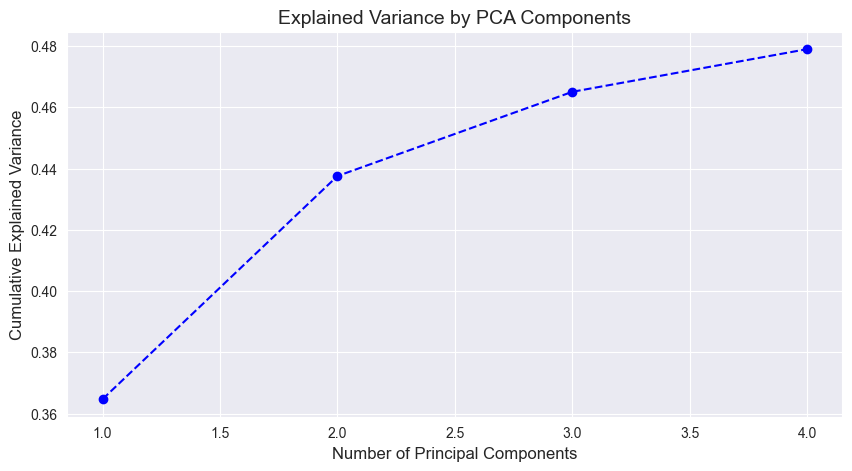

         PC1       PC2       PC3       PC4    Target
0   1.639467 -7.568442  0.830519  1.105022  7.003974
1  -2.619540 -3.106622  0.082333 -0.943346  6.908755
2 -13.142801  6.418091 -3.909310 -3.964636  7.170888
3   7.037341  2.313361  2.524736  3.148044  7.170888
4   1.035692  8.801107 -1.498329  0.358982  5.398163


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
features = df_1.iloc[:, 1:-1]
target = df_1.iloc[:, -1]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
pca = PCA(n_components=4)
principal_components = pca.fit_transform(features_scaled)
plt.figure(figsize=(10, 5))
plt.plot(range(1, 5), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components', fontsize=12)
plt.ylabel('Cumulative Explained Variance', fontsize=12)
plt.title('Explained Variance by PCA Components', fontsize=14)
plt.grid()
plt.show()
pca_df = pd.DataFrame(principal_components, columns=[f'PC{i+1}' for i in range(4)])
pca_df['Target'] = target
print(pca_df.head())

In [21]:
pca_df["Target"] = target

In [22]:
pca_df

,PC1,PC2,PC3,PC4,Target
0,1.639467,-7.568442,0.830519,1.105022,7.003974
1,-2.619540,-3.106622,0.082333,-0.943346,6.908755
2,-13.142801,6.418091,-3.909310,-3.964636,7.170888
3,7.037341,2.313361,2.524736,3.148044,7.170888
4,1.035692,8.801107,-1.498329,0.358982,5.398163
...,...,...,...,...,...
495,1.258505,5.354739,1.252892,-0.301232,7.090910
496,2.167821,-2.467791,-4.060649,-3.034414,0.000010
497,10.047907,6.174288,1.033906,-1.617312,0.000010
498,5.345151,4.734563,3.693331,2.402814,0.000010


In [23]:
pca_df.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'Target'], dtype='object')

In [24]:
from sklearn.model_selection import train_test_split
y = pca_df.Target
x = pca_df.drop(columns=['Target'])

In [25]:
x

,PC1,PC2,PC3,PC4
0,1.639467,-7.568442,0.830519,1.105022
1,-2.619540,-3.106622,0.082333,-0.943346
2,-13.142801,6.418091,-3.909310,-3.964636
3,7.037341,2.313361,2.524736,3.148044
4,1.035692,8.801107,-1.498329,0.358982
...,...,...,...,...
495,1.258505,5.354739,1.252892,-0.301232
496,2.167821,-2.467791,-4.060649,-3.034414
497,10.047907,6.174288,1.033906,-1.617312
498,5.345151,4.734563,3.693331,2.402814


In [26]:
y

0      7.003974
1      6.908755
2      7.170888
3      7.170888
4      5.398163
         ...   
495    7.090910
496    0.000010
497    0.000010
498    0.000010
499    7.244942
Name: Target, Length: 500, dtype: float64

In [27]:
x_train, x_text, y_train, y_text = train_test_split(x, y, test_size=0.2, random_state=42)

In [29]:
import numpy as np
import pandas as pd
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsRegressor

def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    diff = np.abs(y_true - y_pred) / denominator
    diff = np.where(denominator == 0, 0, diff)  # Handle division by zero
    return np.mean(diff) * 100

smape_scorer = make_scorer(smape, greater_is_better=False)
X = pca_df.drop(columns=['Target'])
y = pca_df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_params = {
    'n_neighbors': [3, 5, 7, 10, 15, 17, 19, 21, 23, 25],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn = GridSearchCV(KNeighborsRegressor(), param_grid=knn_params, cv=5, scoring=smape_scorer)
knn.fit(X_train, y_train)
y_pred_knn = knn.best_estimator_.predict(X_test)

def evaluate_model(name, y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    smape_value = smape(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"\n{name} Results:")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"SMAPE: {smape_value:.2f}%")
    print(f"R²: {r2:.4f}")

evaluate_model("KNN Regression", y_test, y_pred_knn)
print("\nBest KNN Parameters:", knn.best_params_)


KNN Regression Results:
MSE: 6.1307
RMSE: 2.4760
MAE: 1.8357
SMAPE: 49.14%
R²: 0.2448

Best KNN Parameters: {'metric': 'euclidean', 'n_neighbors': 25, 'weights': 'distance'}


In [ ]:
# sources for the models used and the preprocessing techniques was from a blog on Science direct:
# https://www.sciencedirect.com/science/article/pii/S2665927121000034#tbl2. like the references form the papers on ScienceDirect was taken